In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

%matplotlib inline
sns.set()

---
# Graphical EDA

In [40]:
iris = datasets.load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris_target = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['species'] = df['target'].map(iris_target)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### Computing the ECDF

In [5]:
def ecdf(data):
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    return x, y

In [44]:
data = df[df['target'] == 1]['petal length (cm)']

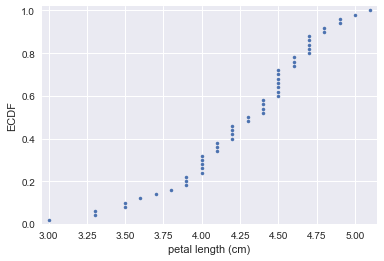

In [45]:
x_vers, y_vers = ecdf(data)

_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

### Comparison of ECDFs

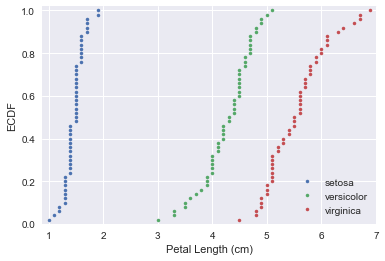

In [48]:
seto = df[df['target'] == 0]['petal length (cm)']
vers = df[df['target'] == 1]['petal length (cm)']
virg = df[df['target'] == 2]['petal length (cm)']

x_set, y_set = ecdf(seto)
x_vers, y_vers = ecdf(vers)
x_virg, y_virg = ecdf(virg)

_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

_ = plt.margins(0.02)
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='best')
_ = plt.xlabel('Petal Length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

---

# Quantitative EDA

In [52]:
df_swing = pd.read_csv("homework3/data/2008-polls.csv")

In [58]:
df_swing.head(2)

,State,Dem,Rep,Date,Pollster
0,AK,33,64,Sep 09 2008,Rasmussen
1,AK,35,54,Sep 02 2008,IvanMooreResearch


In [55]:
np.percentile(df_swing[df_swing['State'] == 'PA']['Dem'], [25, 50, 75])

array([46.5, 49. , 52. ])

In [62]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(vers, percentiles)
ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

### Comparing Percentiles to ECDF

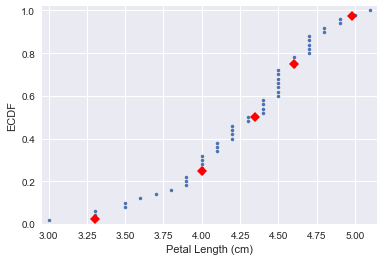

In [64]:
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('Petal Length (cm)')
_ = plt.ylabel('ECDF')

_ = plt.plot(ptiles_vers, percentiles/100., 
             marker='D', color='red',
             linestyle='none')

plt.show()

### Box & Whisker Plots

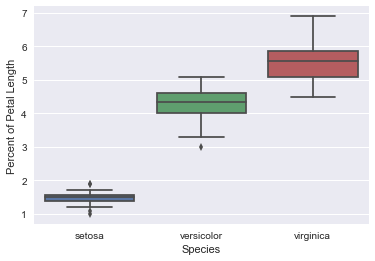

In [65]:
sns.boxplot(x='species', y='petal length (cm)', data=df)

_ = plt.xlabel('Species')
_ = plt.ylabel('Percent of Petal Length')

plt.show()

### Covariance & Pearson Correlation

In [106]:
!wget https://raw.githubusercontent.com/dataofnote/us-presidential-election-county-results/master/data/us-presidential-election-county-results-2004-through-2012.csv

--2018-03-28 19:40:32--  https://raw.githubusercontent.com/dataofnote/us-presidential-election-county-results/master/data/us-presidential-election-county-results-2004-through-2012.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777607 (759K) [text/plain]
Saving to: ‘us-presidential-election-county-results-2004-through-2012.csv’

us-presidential-ele 100%[===================>] 759.38K  4.86MB/s    in 0.2s    

2018-03-28 19:40:32 (4.86 MB/s) - ‘us-presidential-election-county-results-2004-through-2012.csv’ saved [777607/777607]



In [107]:
df_swing = pd.read_csv("us-presidential-election-county-results-2004-through-2012.csv")

In [108]:
df_swing.shape

(9461, 15)

In [119]:
df_swing = df_swing[df_swing['year'] == 2008]
df_swing = df_swing[df_swing['pct_dem'] >= 0.0]
df_swing = df_swing[df_swing['pct_rep'] >= 0.0]

In [120]:
df_swing.head(2)

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
3154,2008,AL,Autauga County,01001,17403,6093,145,23641,73.6,25.8,0.6,rep,dem,73.6,47.8
3155,2008,AL,Baldwin County,01003,61271,19386,756,81413,75.3,23.8,0.9,rep,dem,75.3,51.5


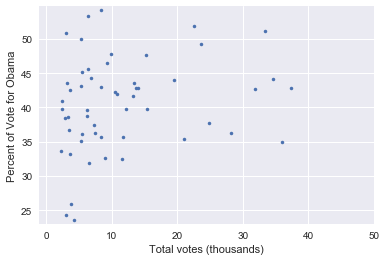

In [140]:
x = df_swing[df_swing['state'] == 'WV']['vote_total']/1000.
y = df_swing[df_swing['state'] == 'WV']['pct_dem']

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlim([-1,50])
_ = plt.xlabel('Total votes (thousands)')
_ = plt.ylabel('Percent of Vote for Obama')
plt.show()

In [141]:
cov_mat = np.cov(x, y)
print(cov_mat)

[[182.35905403  24.98711541]
 [ 24.98711541  46.68430222]]


In [142]:
cov_xy = cov_mat[0,1]
print(cov_xy)

24.987115407407405


In [144]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

pearson_r(x,y)

0.27081144929493856

---
# Thinking Probabilistically -- Discrete Variables

### Simulating 4 coin flips

In [154]:
# np.random.seed(42)

random_numbers = np.random.random(size=4)
heads = random_numbers < 0.5
np.sum(heads)

2

In [160]:
n_all_heads = 0 # Initialize number of 4-heads trials

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads/10000

0.0619

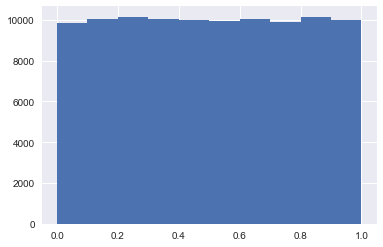

In [162]:
random_numbers = np.empty(100000)

for i in range(100000):
    random_numbers[i] = np.random.random(size=1)

_ = plt.hist(random_numbers)
plt.show()

In [163]:
def perform_bernoulli_trials(n, p):
    
    n_success = 0
    for i in range(n):
        random_number = np.random.random(1)
        if random_number < p:
            n_success += 1
    return n_success

### How many defaults do we expect?
* A bank made 100 loans
* It is possible 0 to 100 loans will be defaulted upon
* What is the probability of getting a given number of defaults, given that the probability of a default is 0.05?

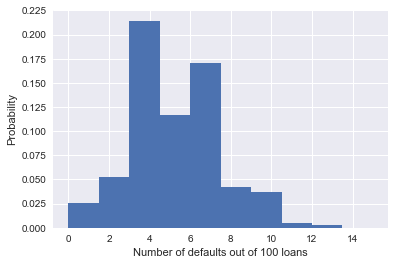

In [167]:
n_defaults = np.empty(10000)

for i in range(10000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel("Number of defaults out of 100 loans")
_ = plt.ylabel("Probability")

plt.show()

### Will the bank fail?
* If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

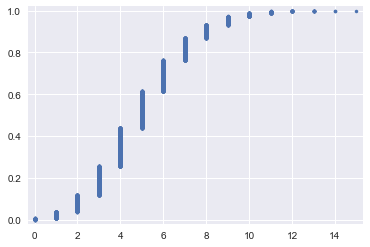

Probability of losing money = 0.0283


In [176]:
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(0.02)

plt.show()

n_lose_money = np.sum(n_defaults >= 10)

print("Probability of losing money =", n_lose_money/len(n_defaults))

In [177]:
probs = []
for j in range(0, 25):
    n_lose_money = np.sum(n_defaults >= j)
    prob = n_lose_money/len(n_defaults)
    probs.append(prob)

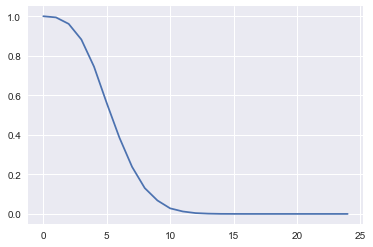

In [181]:
plt.plot(np.arange(len(probs)), probs)

### Probability Mass Functions

In [185]:
# the number of r successes in n trials with probability p
samples = np.random.binomial(60, 0.1, size=10000)
samples

array([4, 5, 5, ..., 5, 7, 6])

#### The Binomial CDF

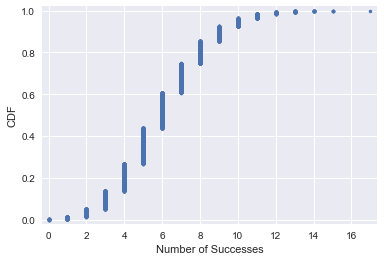

In [186]:
x, y = ecdf(samples)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel("Number of Successes")
_ = plt.ylabel("CDF")

plt.show()

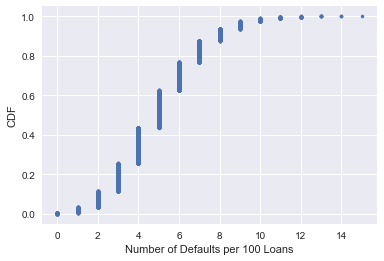

In [189]:
n_defaults = np.random.binomial(100, 0.05, 10000)
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel("Number of Defaults per 100 Loans")
_ = plt.ylabel("CDF")

plt.show()

#### The Binomial PMF

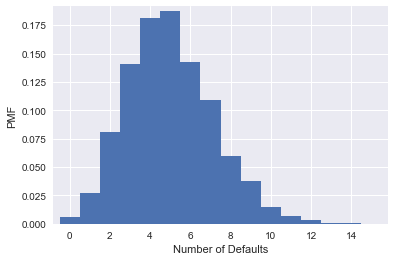

In [191]:
bins = np.arange(0, max(n_defaults) + 2) - 0.5

_ = plt.hist(n_defaults, normed=True, bins=bins)
_ = plt.margins(0.02)
_ = plt.xlabel("Number of Defaults")
_ = plt.ylabel("PMF")

plt.show()

#### The Poisson Distribution
* Limit of the Binomial Distribution for low probability of success and large number of trials
* That is, for rare events

* The number r of arrivals of a Poisson process in a given time interval with average rate of $\lambda$ arrivals per interval is Poisson distributed

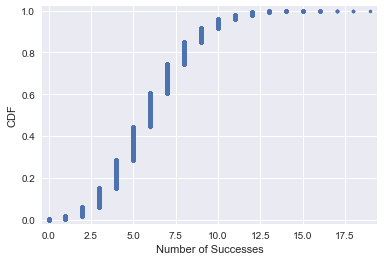

In [193]:
samples = np.random.poisson(lam=6, size=100000)
x, y = ecdf(samples)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel("Number of Successes")
_ = plt.ylabel("CDF")

plt.show()

#### Relationship between Binomial and Poisson

In [197]:
samples_poisson = np.random.poisson(lam=10, size=10000)

print("Poisson: ", np.mean(samples_poisson), np.std(samples_poisson))

n = [20, 100, 1000, 10000, 100000]
p = [0.5, 0.1, 0.01, 0.001, 0.0001]

for i in range(5):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    
    print("n =", n[i], "Binom:", np.mean(samples_binomial), 
                                 np.std(samples_binomial))


Poisson:  9.9514 3.1891751347331176
n = 20 Binom: 9.989 2.229815911684191
n = 100 Binom: 10.0703 3.005654323105037
n = 1000 Binom: 9.9718 3.1237485110040466
n = 10000 Binom: 9.957 3.1422843601431114
n = 100000 Binom: 9.9785 3.157314958948505


In [201]:
n_nohitters = np.random.poisson(lam = 251/115, size=10000)

n_large = np.sum(n_nohitters >= 7)

p_large = n_large/len(n_nohitters)

print("Probability of 7 or more no-hitters:", p_large)

Probability of 7 or more no-hitters: 0.007


---
# Thinking Probabilistically -- Continuous Variables

### Normal Distribution

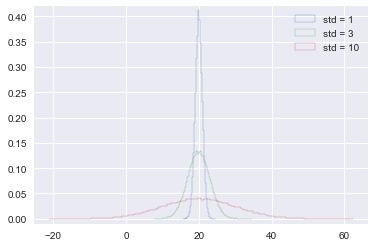

In [202]:
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
_ = plt.ylim(-0.01, 0.42)

plt.show()

### Normal CDF

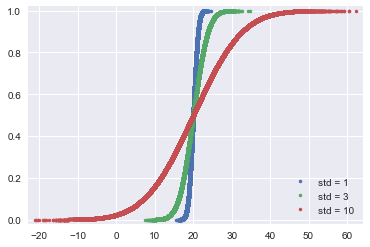

In [203]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)


# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
_ = plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

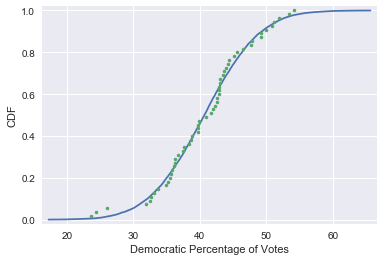

In [213]:
dem_pct = df_swing[df_swing['state'] == 'WV']['pct_dem']
# dem_pct = df_swing['pct_dem']


mu = np.mean(dem_pct)
sigma = np.std(dem_pct)

samples = np.random.normal(mu, sigma, size=10000)

x_theory, y_theory = ecdf(samples)
x, y = ecdf(dem_pct)

_ = plt.plot(x_theory, y_theory)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel("Democratic Percentage of Votes")
_ = plt.ylabel("CDF")

plt.show()

In [218]:
samples = np.random.normal(mu, sigma, 1000000)
prob = np.sum(samples > 50)/len(samples)
print("Probability of a WV County Voting > 50% Dem:", prob)

Probability of a WV County Voting > 50% Dem: 0.084564


### The Exponential Distribution
* The waiting times between arrivals of a Poisson process is Exponentially Distributed

In [219]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

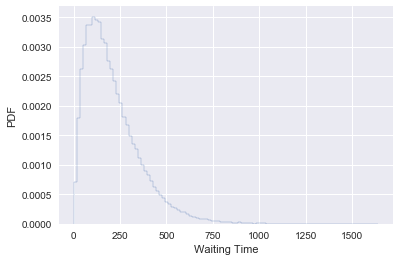

In [226]:
waiting_times = successive_poisson(100, 110, size=100000)

_ = plt.hist(waiting_times, bins=100, normed=True, histtype='step')
_ = plt.xlabel("Waiting Time")
_ = plt.ylabel("PDF")

plt.show()

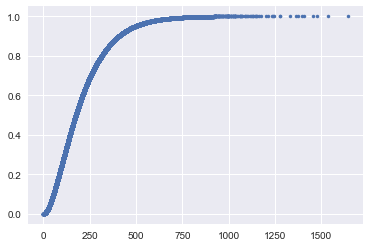

In [227]:
x, y = ecdf(waiting_times)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.show()

---
# Parameter Estimation by Optimization

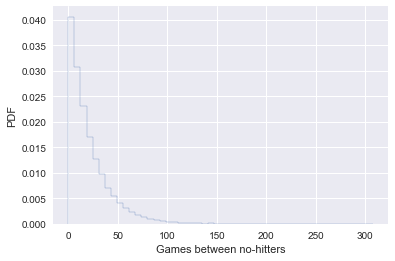

In [240]:
nohitter_times = np.random.randint(low = 1, high=5, size=100000)
nohitter_times = np.exp(nohitter_times)
tau = np.mean(nohitter_times)

inter_nohitter_time = np.random.exponential(tau, size=100000)

_ = plt.hist(inter_nohitter_time, bins=50, normed=True, histtype='step')
_ = plt.xlabel("Games between no-hitters")
_ = plt.ylabel("PDF")

plt.show()

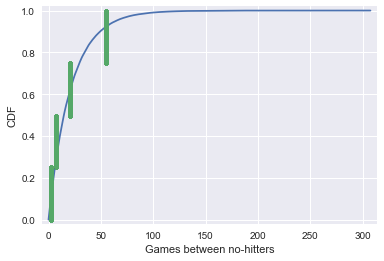

In [241]:
x, y = ecdf(nohitter_times)
x_theory, y_theory = ecdf(inter_nohitter_time)

_ = plt.plot(x_theory, y_theory)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel("Games between no-hitters")
_ = plt.ylabel("CDF")

plt.show()

---
# Bootstrap Confidence Intervals
### Bootstrapping
* The use of resampled data to perform statistical inference
#### Bootstrap Sample
* A resampling of the data
#### Bootstrap Replicate
* A statistic computed from resampled data

### Visualizing Bootstrap Samples

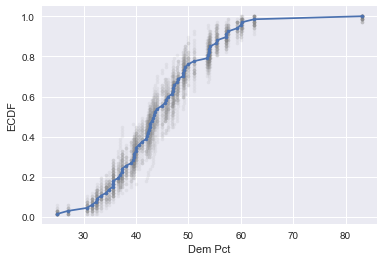

In [244]:
dem_pct = df_swing[df_swing['state'] == 'PA']['pct_dem']
# dem_pct = df_swing['pct_dem']

for _ in range(50):
    
    bs_sample = np.random.choice(dem_pct, size=len(dem_pct))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray',
                 alpha=0.1)

x, y = ecdf(dem_pct)
_ = plt.plot(x, y, marker='.')
_ = plt.xlabel("Dem Pct")
_ = plt.ylabel("ECDF")

plt.show()

### Bootstrap Confidence Intervals

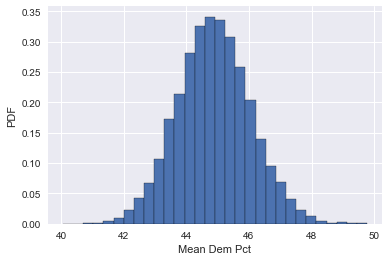

In [249]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(dem_pct, np.mean)
    
_ = plt.hist(bs_replicates, bins=30, normed=True,
             edgecolor="k")
_ = plt.xlabel("Mean Dem Pct")
_ = plt.ylabel("PDF")

plt.show()

### Confidence Interval
* If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval

#### 95th Percentile

In [250]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([42.6313209 , 47.25123134])

### Generating Many Bootstrap Replicates

In [251]:
def draw_bs_reps(data, func, size=1):
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    
    return bs_replicates

1.1819625472656696
1.1836184883561027


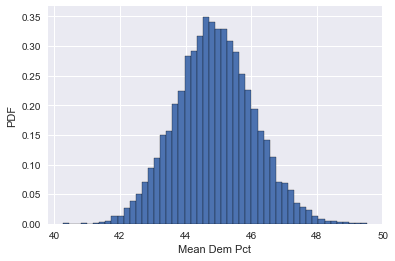

In [252]:
bs_replicates = draw_bs_reps(dem_pct, np.mean, size=10000)

# standard error of the mean
sem = np.std(dem_pct) / np.sqrt(len(dem_pct))
print(sem)

bs_std = np.std(bs_replicates)
print(bs_std)

_ = plt.hist(bs_replicates, bins=50, normed=True, edgecolor="k")
_ = plt.xlabel("Mean Dem Pct")
_ = plt.ylabel("PDF")

plt.show()

### Bootstrap Replicates of other Statistics

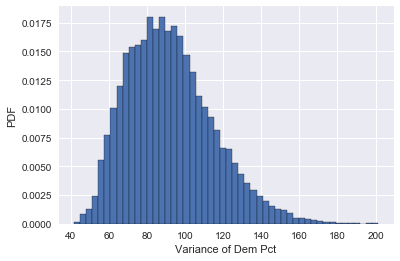

In [253]:
bs_replicates = draw_bs_reps(dem_pct, np.var, size=10000)

_ = plt.hist(bs_replicates, bins=50, normed=True, edgecolor='k')
_ = plt.xlabel("Variance of Dem Pct")
_ = plt.ylabel("PDF")

plt.show()

#### Confidence Interval on the Dem Pct

In [257]:
bs_replicates = draw_bs_reps(dem_pct, np.mean, size=10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print("95% CI =", conf_int)

95% CI = [42.62133955 47.24673881]


## Nonparametrics Inference
* Make no assumptions about the model or probability distribution underlying the data

### Pairs Bootstrap for Linear Regression (1 var)
* Resample data in pairs
* Compute slope and intercept from resampled data
* Each slope and intercept is a bootstrap replicate
* Compute confidence intervals from percentiles of bootstrap replicates

In [258]:
def draw_bs_pairs_linreg(x, y, size=1):
    
    inds = np.arange(len(x))
    
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = polyfit(bs_x, bs_y, 1)
        
    return bs_slope_reps, bs_intercept_reps

In [259]:
df_swing.head(2)

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
3154,2008,AL,Autauga County,01001,17403,6093,145,23641,73.6,25.8,0.6,rep,dem,73.6,47.8
3155,2008,AL,Baldwin County,01003,61271,19386,756,81413,75.3,23.8,0.9,rep,dem,75.3,51.5


In [271]:
df_swing.shape

(3153, 15)

[1.54906228 1.7044271 ]


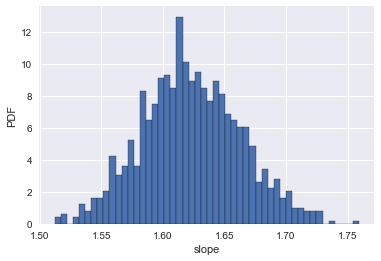

In [285]:
from numpy import polyfit

df_swing_sub = df_swing[df_swing['vote_dem'] < 750000]

x = df_swing_sub['vote_dem'].reset_index(drop=True)
y = df_swing_sub['vote_total'].reset_index(drop=True)

bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x, y, size=1000)

print(np.percentile(bs_slope_reps, [2.5, 97.5]))

_ = plt.hist(bs_slope_reps, bins=50, normed=True, edgecolor='k')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')

plt.show()

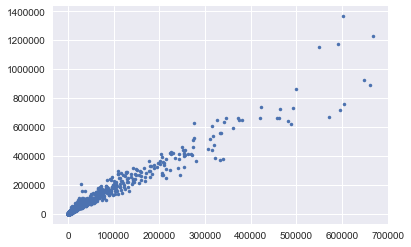

In [286]:
plt.plot(x, y, marker='.', linestyle='none')

### Plotting Bootstrap Regressions

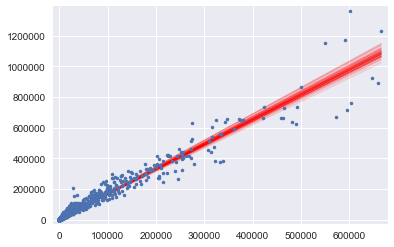

In [287]:
xx = np.array([0, np.max(x)])

for i in range(100):
    
    _ = plt.plot(xx, bs_slope_reps[i]*xx + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')
    
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(0.02)

plt.show()

---
# Hypothesis Testing
* Assessment of how reasonable the observed data are assuming the hypothesis is true

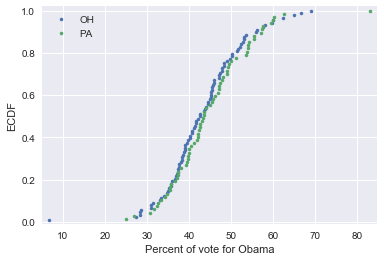

In [301]:
oh = df_swing[df_swing['state'] == 'OH']['pct_dem']
pa = df_swing[df_swing['state'] == 'PA']['pct_dem']
ca = df_swing[df_swing['state'] == 'CA']['pct_dem']
al = df_swing[df_swing['state'] == 'AL']['pct_dem']

x_oh, y_oh = ecdf(oh)
x_pa, y_pa = ecdf(pa)

_ = plt.plot(x_oh, y_oh, marker='.', linestyle='none', label="OH")
_ = plt.plot(x_pa, y_pa, marker='.', linestyle='none', label="PA")
_ = plt.margins(0.02)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("ECDF")
_ = plt.legend(loc="best")

plt.show()

### Simulate the Hypothesis
* Null Hypothesis -- OH and PA are identically distributed 
* Use permutation (random reordering of entries in an array) 
* Heart of simulating the null hypothesis

In [295]:
dem_share_both = np.concatenate((pa, oh))
dem_share_perm = np.random.permutation(dem_share_both)

perm_sample_PA = dem_share_perm[:len(pa)]
perm_sample_OH = dem_share_perm[len(pa):]

In [302]:
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

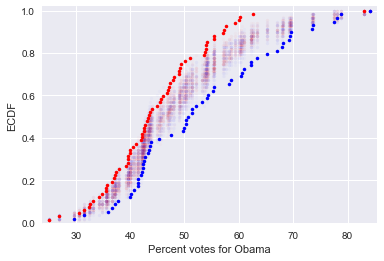

In [314]:
for _ in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(pa, ca)
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

x_1, y_1 = ecdf(pa)
x_2, y_2 = ecdf(ca)

_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

_ = plt.margins(0.02)
_ = plt.xlabel("Percent votes for Obama")
_ = plt.ylabel("ECDF")

plt.show()

#### Conclusion: Not from the same distribution

## Test Statistics & p-Values
* Test Statistic: A single number that can be computed from observed data and from data you simulate under the null hypothesis
* It serves as a basis of comparision between the two

* If the two states are equal, their mean vote share should be equal, and so the difference should be 0
* We will use the difference in means as our test statistic

#### Permutation Replicate

In [335]:
pa_perm, oh_perm = permutation_sample(pa, oh)
print("Permuted Mean Diff:", np.mean(pa_perm) - np.mean(oh_perm))
print("Actual Mean Diff:", np.mean(pa) - np.mean(oh))

Permuted Mean Diff: -2.442879918588879
Actual Mean Diff: 1.4754969470827746


#### p-value
* Probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true

### Generating Permutation Replicates

In [329]:
def draw_perm_reps(data_1, data_2, func, size=1):
    
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

In [330]:
def diff_of_means(data_1, data_2):
    
    diff = np.mean(data_1) - np.mean(data_2)
    
    return diff

In [367]:
empirical_diff_means = diff_of_means(pa, oh)
print(empirical_diff_means)
perm_replicates = draw_perm_reps(pa, oh, diff_of_means, size=10000)

p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

print("p-value = ", p)

1.4754969470827746
p-value =  0.1732


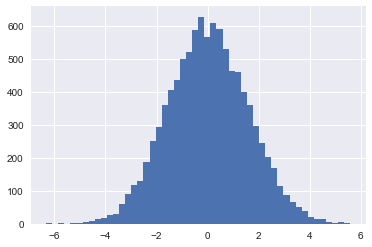

In [366]:
_ = plt.hist(perm_replicates, bins=50)
plt.show()

### Bootstrap Hypothesis Tests
#### Pipeline for Hypothesis Testing
* Clearly state the null hypothesis
* Define your test statistic
* Generate many sets of simulated data assuming the null hypothesis is true
* Compute the test statistic for each simulated dataset
* The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

In [346]:
# Someone reports CA dem pct mean is 60%
np.mean(ca)

53.14310344827586

56.0


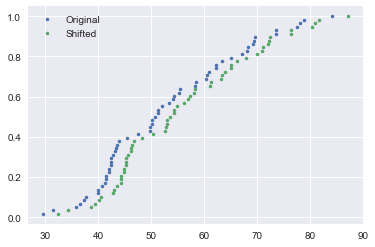

In [361]:
# Shift the data
reported_mean = 56
ca_shifted = ca - np.mean(ca) + reported_mean

print(np.mean(ca_shifted))

x, y = ecdf(ca)
x_sh, y_sh = ecdf(ca_shifted)

_ = plt.plot(x, y, marker='.', linestyle='none', label="Original")
_ = plt.plot(x_sh, y_sh, marker='.', linestyle='none', label="Shifted")
_ = plt.legend(loc='best')

plt.show()

In [363]:
# Now use bootstrapping on the shifted data

def diff_from_reported(data, reported_mean = 56):
    
    return np.mean(data) - reported_mean

diff_obs = diff_from_reported(ca)
diff_obs

-2.856896551724141

In [372]:
# Use shifted because shifted are what we use to simulate null hypothesis
bs_replicates = draw_bs_reps(ca_shifted, diff_from_reported, 10000)

p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value

0.0404

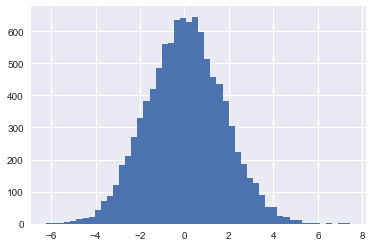

In [371]:
_ = plt.hist(bs_replicates, bins=50)

### A one-sample Bootstrap Hypothesis Test

In [379]:
# Test: the mean of ca is equal to reported ca mean

ca_shifted = ca + 49 - np.mean(ca)

bs_replicates = draw_bs_reps(ca_shifted, np.mean, 10000)

p = np.sum(bs_replicates >= np.mean(ca)) / 10000

print("p = ", p)
print(np.mean(ca))

p =  0.0093
53.14310344827586


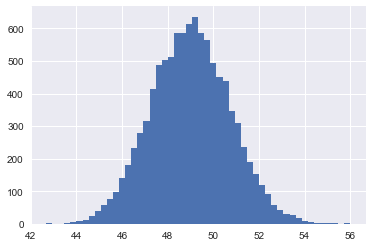

In [380]:
_ = plt.hist(bs_replicates, bins=50)

### A bootstrap test for identical distributions

In [392]:
empirical_diff_means = diff_of_means(pa, oh)

data_concat = np.concatenate((pa, oh))

bs_replicates = np.empty(10000)

for i in range(10000):
    
    bs_sample = np.random.choice(data_concat, size=len(data_concat))
    bs_replicates[i] = diff_of_means(bs_sample[:len(pa)],
                                     bs_sample[len(pa):])

p = np.sum(bs_replicates >= empirical_diff_means)/len(bs_replicates)
print("p = ", p)

p =  0.1821


In [393]:
empirical_diff_means

1.4754969470827746

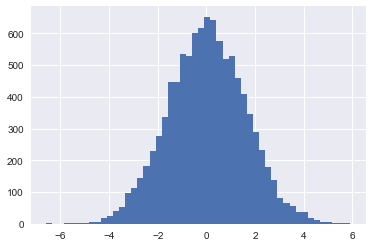

In [394]:
_ = plt.hist(bs_replicates, bins=50)

### A two-sample bootstrap hypothesis test for difference of means

In [395]:
mean_all = np.mean(data_concat)

pa_shifted = pa - np.mean(pa) + mean_all
oh_shifted = oh - np.mean(oh) + mean_all

bs_replicates_pa = draw_bs_reps(pa_shifted, np.mean, size=10000)
bs_replicates_oh = draw_bs_reps(oh_shifted, np.mean, size=10000)

bs_replicates = bs_replicates_pa - bs_replicates_oh

p_value = np.sum(bs_replicates >= empirical_diff_means)/len(bs_replicates)

print("p = ", p_value)

p =  0.1713


#### The hypothesis that the means are equal as opposed to having identical distributions gives a somewhat larger p-value

---
# AB Testing

In [397]:
dems = np.array([True]*153 + [False]*91)
reps = np.array([True]*136 + [False]*35)

def frac_yay_dems(dems, reps):
    
    frac = np.sum(dems)/len(dems)
    
    return frac

perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, size=10000)

p = np.sum(perm_replicates <= 153/244)/len(perm_replicates)
print(p)

0.0003


### Test of Correlation

* Posit null hypothesis: the two variables are completely uncorrelated
* Simulate the data assuming the null hypothesis is true
* Use Pearson correlation, $\rho$, as a test statistic
* Compute p-value as fraction of replicates that have $\rho$ at least as large as observed

In [398]:
x = df_swing_sub['vote_dem'].reset_index(drop=True)
y = df_swing_sub['vote_total'].reset_index(drop=True)

r_obs = pearson_r(x, y)

perm_replicates = np.empty(10000)

for i in range(10000):
    x_perm = np.random.permutation(x)
    perm_replicates[i] = pearson_r(x_perm, y)

p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print(p)

0.0


In [ ]:
+-----------+-----------+------------+
| Member_id | Company   | Year_Start |
+-----------+-----------+------------+
| 1         | Microsoft | 2000       |
| 1         | Google    | 2006       |
| 1         | Facebook  | 2012       |
| 2         | Microsoft | 2001       |
| 2         | Oracle    | 2004       |
| 2         | Google    | 2007       |